Chapter 06

# 矩阵乘法第二视角
Book_4《矩阵力量》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码演示了如何通过矩阵分块的方式，使用矩阵的列与行的外积来重建矩阵乘积。具体步骤如下：

1. **定义绘制函数**：`plot_heatmap`函数用于可视化矩阵，通过`seaborn`的`heatmap`绘制热图，用色彩表示矩阵元素的值。

2. **生成随机矩阵 \( A \) 和 \( B \)**：首先，生成尺寸为 \(6 \times 4\) 的矩阵 \( A \) 和 \(4 \times 3\) 的矩阵 \( B \)。通过缩放，使矩阵元素的取值范围在 \([-1, 1]\) 之间。

3. **矩阵乘积 \( C \)**：计算矩阵乘积 \( C = A \times B \)，其中 \( C \) 的每个元素 \( C_{ij} \) 定义为
   $$
   C_{ij} = \sum_{k=1}^4 A_{ik} \cdot B_{kj}
   $$
   这产生了一个新的 \(6 \times 3\) 的矩阵 \( C \)，并对其进行可视化。

4. **逐步分块重建矩阵 \( C \)**：定义一个与 \( C \) 形状相同的零矩阵 \( C_{\text{rep}} \)，逐步累加矩阵分块的乘积来重建 \( C \)：
   
   - 对于每列索引 \( i \) (从 0 到 3)，计算 \( A \) 的第 \(i\) 列和 \( B \) 的第 \(i\) 行的外积，即：
     $$
     C_i = A[:, i] \times B[i, :]
     $$
     这给出了矩阵 \( C \) 中只涉及 \( A \) 的第 \(i\) 列和 \( B \) 的第 \(i\) 行的部分贡献矩阵 \( C_i \)，即
     $$
     C_i = \begin{bmatrix} A_{11} \cdot B_{i1} & A_{12} \cdot B_{i2} & \dots \end{bmatrix}
     $$

   - 将 \( C_i \) 累加到 \( C_{\text{rep}} \) 中，以逐步重建 \( C \)。此累加过程可以用公式表示为
     $$
     C_{\text{rep}} = \sum_{i=1}^4 C_i
     $$
     
5. **可视化重建的矩阵**：最终，通过绘制 \( C_{\text{rep}} \) 验证重建的矩阵是否与 \( C \) 相同。

In [1]:
import matplotlib.pyplot as plt  # 导入绘图库
import numpy as np  # 导入数值计算库
import seaborn as sns  # 导入热图绘制库

## 定义函数：绘制热图

In [2]:
def plot_heatmap(x, title):  # 定义热图绘制函数
    fig, ax = plt.subplots()  # 创建子图
    ax = sns.heatmap(x,  # 绘制热图
                     cmap='RdYlBu_r',  # 选择颜色映射
                     cbar_kws={"orientation": "horizontal"}, vmin=-1, vmax=1)  # 设置颜色条方向和取值范围
    ax.set_aspect("equal")  # 设置坐标轴比例
    plt.title(title)  # 设置标题

## 生成矩阵 A 和 B

In [3]:
A = np.random.randint(0, 40 + 1, size=(6, 4))  # 生成 6x4 矩阵 A，元素为 0 到 40 的随机整数
A = A / 20 - 1  # 将矩阵 A 的元素缩放到 -1 到 1 范围内

In [4]:
B = np.random.randint(0, 40 + 1, size=(4, 3))  # 生成 4x3 矩阵 B，元素为 0 到 40 的随机整数
B = B / 20 - 1  # 将矩阵 B 的元素缩放到 -1 到 1 范围内

## 可视化矩阵 A 和 B

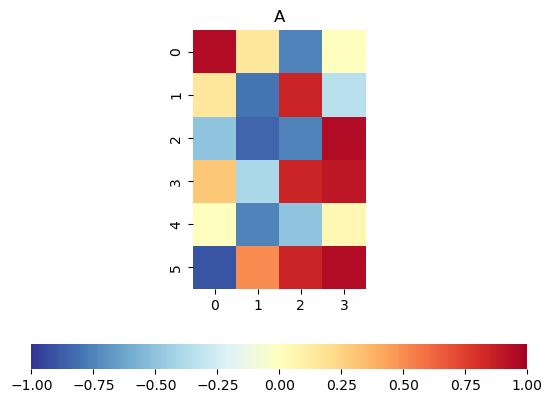

In [5]:
plot_heatmap(A, 'A')  # 可视化矩阵 A

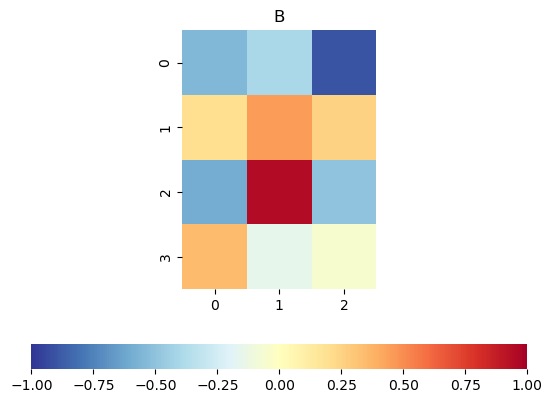

In [6]:
plot_heatmap(B, 'B')  # 可视化矩阵 B

## 可视化矩阵乘积 C = AB

In [7]:
C = A @ B  # 计算矩阵 C 为 A 和 B 的乘积

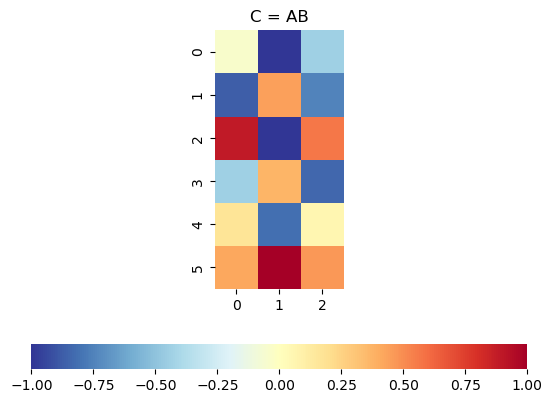

In [8]:
plot_heatmap(C, 'C = AB')  # 可视化矩阵 C

In [9]:
C_rep = np.zeros_like(C)  # 创建与 C 形状相同的零矩阵，用于存储逐步计算的结果

## 逐元素重建矩阵 C

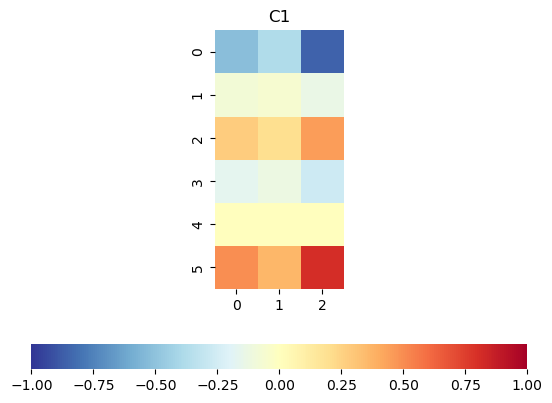

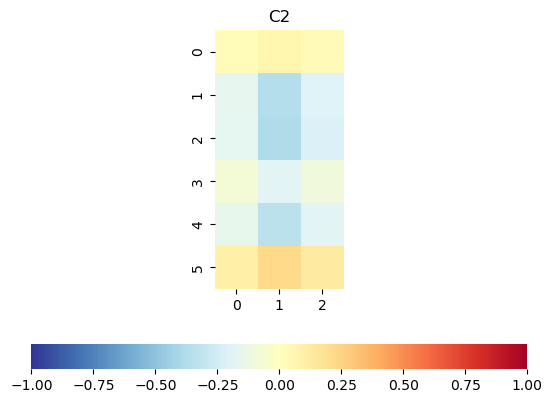

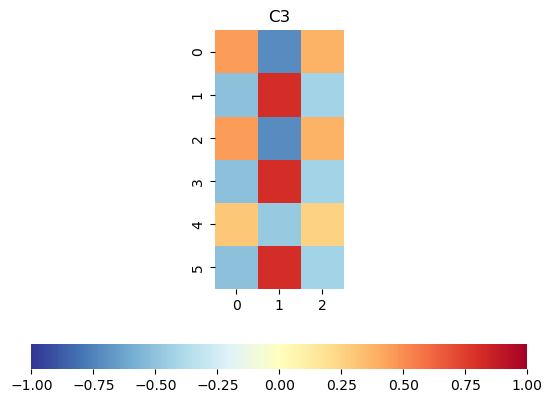

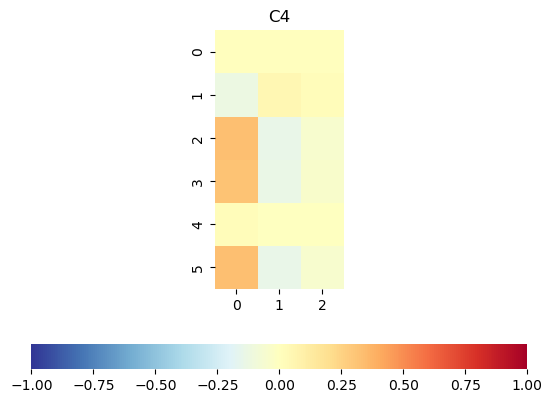

In [10]:
for i in np.arange(4):  # 遍历矩阵 A 和 B 的列
    C_i = A[:, [i]] @ B[[i], :]  # 计算 A 的第 i 列和 B 的第 i 行的外积
    title = 'C' + str(i + 1)  # 设置子矩阵标题
    plot_heatmap(C_i, title)  # 可视化子矩阵 C_i
    C_rep = C_rep + C_i  # 将 C_i 加到 C_rep 中

## 可视化重建后的矩阵 C

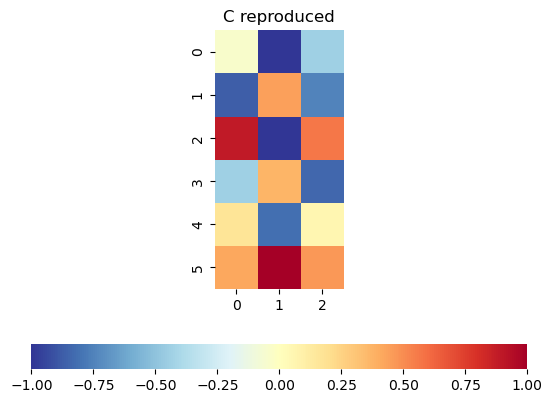

In [11]:
plot_heatmap(C_rep, 'C reproduced')  # 可视化重建的矩阵 C_rep